<a href="https://colab.research.google.com/github/SaiMithunPunna/AIDS/blob/main/GridSearch_vs_RandomSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.datasets import load_iris

# **Load dataset**

In [3]:
df=load_iris()
x=df.data
y=df.target

# **Define hyper parameter grid**

In [6]:
param_grid= {
    'n_estimators':[10 , 50 , 100 , 200] ,
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}


#split into 80-20 for trainign and testing

X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.2 , random_state=42)

# **Apply Grid Search CV**

In [9]:
grid_search=GridSearchCV(RandomForestClassifier() , param_grid , cv=5 , n_jobs=-1 , verbose=1)
grid_search.fit(X_train,  y_train)

#get best params
print('Best Params from Grid Search  : ' , grid_search.best_params_)



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Params from Grid Search  :  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


# **Apply Randomized Search CV**

In [11]:
random_search=RandomizedSearchCV(RandomForestClassifier() , param_grid , n_iter=10  , cv=5 , n_jobs=-1 , verbose=1 , random_state=42)
random_search.fit(X_train , y_train)

#get best params

print('Best Params from Random Search : ' , random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params from Random Search :  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}


# **Evaluate Model Performance**

In [13]:
#train model with best params
best_grid_model=grid_search.best_estimator_
best_random_model=random_search.best_estimator_

#Predictions
y_pred_grid=best_grid_model.predict(X_test)
y_pred_random=best_random_model.predict(X_test)


#Accuracy scores
acc_grid=accuracy_score(y_test , y_pred_grid)
acc_random=accuracy_score(y_test , y_pred_random)

print('Accuracy with Grid Search : ' , acc_grid)
print('Accuracy with Random Search : ' , acc_random)

Accuracy with Grid Search :  1.0
Accuracy with Random Search :  1.0


# **Confusion Metrix**


<Axes: >

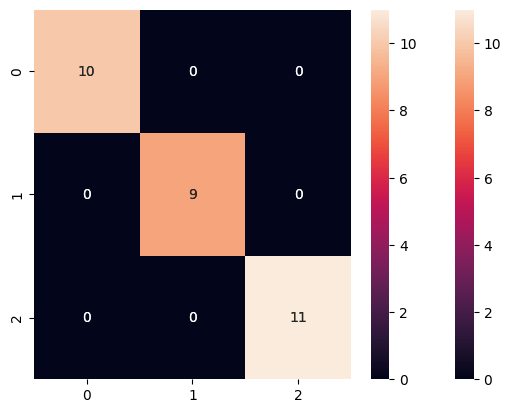

In [17]:

cmg=confusion_matrix(y_test , y_pred_grid)
cmr=confusion_matrix(y_test , y_pred_random)
sns.heatmap(cmg , annot=True)
sns.heatmap(cmr , annot=True)